## Outdegree distribution of WGD-derived and SSD-derived miRNA pairs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

______________________________

In [2]:
network = 'tarbase'
delta_path = '../../Motif_analysis_mirgenedb_SSD/Delta/'

network_path = f'../../../OhnomiRNAs/dataset/Network_parsing/{network}/{network}.gene.edge'
om_path = delta_path + 'ohnomirna_singles_predict_Hsa_existent.names.extended_info.flagged_WGD_host_genes.names_only.tsv'
pm_ensembl_path = delta_path + 'all_hsa_ensembl_singles_paralogmirna_clean.mirgenedb_and_mribase_info.host_gene.names_only.tsv'
pm_mgdb_path = delta_path + 'mgdb_3_hsa.premirna_paralog_singles.extended_info.host_gene.names_only.tsv'

In [3]:
df_network = pd.read_csv(network_path, sep='\t', header=None, names=['miRNA', 'target'])

outdeg_dic = {}
for miRNA in df_network['miRNA'].unique():
	outdeg_dic[miRNA] = len(df_network[df_network['miRNA'] == miRNA])

In [4]:
# for each miRNA in the om_path, pm_ensembl_path, and pm_mgdb_path files, calculate the outdegree. Save the lists of outdegrees in three different lists.
df_om = pd.read_csv(om_path, sep='\t', header=None, names=['miRNA'])
df_pm_ensembl = pd.read_csv(pm_ensembl_path, sep='\t', header=None, names=['miRNA'])
df_pm_mgdb = pd.read_csv(pm_mgdb_path, sep='\t', header=None, names=['miRNA'])

In [5]:
# remove from df_pm_ensembl and df_pm_mgdb the miRNAs that are already in df_om
df_pm_ensembl = df_pm_ensembl[~df_pm_ensembl['miRNA'].isin(df_om['miRNA'])]
df_pm_mgdb = df_pm_mgdb[~df_pm_mgdb['miRNA'].isin(df_om['miRNA'])]

In [6]:
outdeg_om = []
outdeg_pm_ensembl = []
outdeg_pm_mgdb = []
all_outdeg = []
nondup_outdeg = []

for miRNA in df_network['miRNA'].unique():
	all_outdeg.append(outdeg_dic[miRNA])

for miRNA in df_om['miRNA'].unique():
	if miRNA in outdeg_dic:
		outdeg_om.append(outdeg_dic[miRNA])

for miRNA in df_pm_ensembl['miRNA'].unique():
	if miRNA in outdeg_dic:
		outdeg_pm_ensembl.append(outdeg_dic[miRNA])

for miRNA in df_pm_mgdb['miRNA'].unique():
	if miRNA in outdeg_dic:
		outdeg_pm_mgdb.append(outdeg_dic[miRNA])


# in nondup_outdeg, add the outdegree of mirnas that are not duplicated in the om_path, pm_ensembl_path, and pm_mgdb_path files.
for miRNA in df_network['miRNA'].unique():
	if miRNA not in df_om['miRNA'].unique() and miRNA not in df_pm_ensembl['miRNA'].unique():
		nondup_outdeg.append(outdeg_dic[miRNA])

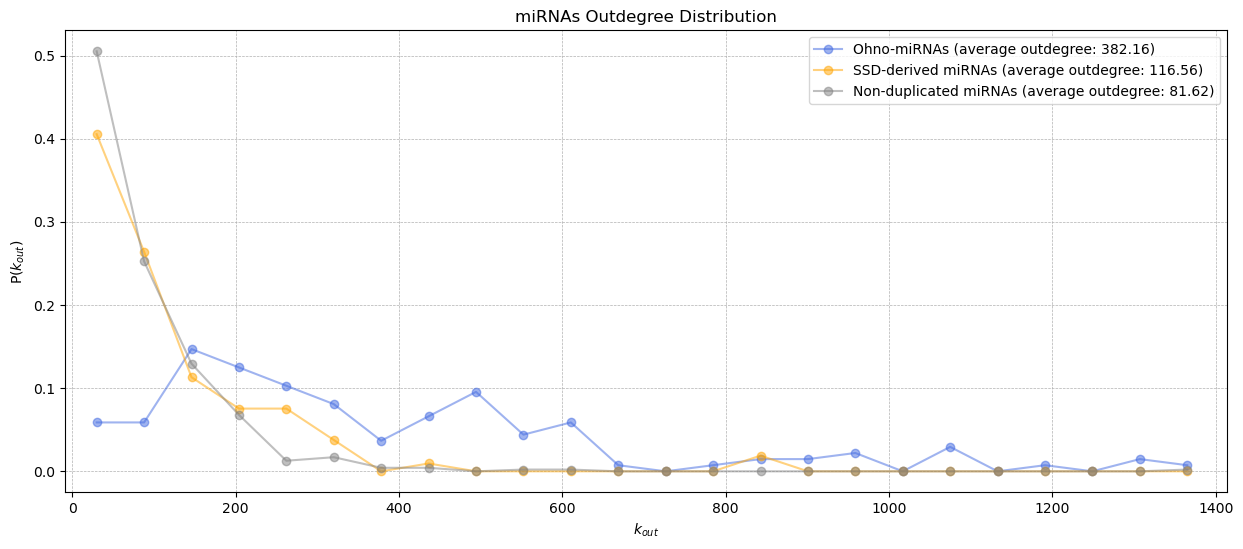

In [8]:
nbins = 10
distr_alpha = 0.5

# 2) Convert to a NumPy array and filter any non-positive (if applicable)
degrees_om = np.array(outdeg_om)
degrees_pm_ensembl = np.array(outdeg_pm_ensembl)
degrees_pm_mgdb = np.array(outdeg_pm_mgdb)
degrees_nodup = np.array(nondup_outdeg)
degrees_om = degrees_om[degrees_om > 0]
degrees_pm_ensembl = degrees_pm_ensembl[degrees_pm_ensembl > 0]
degrees_pm_mgdb = degrees_pm_mgdb[degrees_pm_mgdb > 0]
degrees_nodup = degrees_nodup[degrees_nodup > 0]

avg_om = np.mean(degrees_om)
avg_pm_ensembl = np.mean(degrees_pm_ensembl)
avg_pm_mgdb = np.mean(degrees_pm_mgdb)
avg_nodup = np.mean(degrees_nodup)

# 1) Combine all outdegree lists into a single array
degrees = np.concatenate((degrees_om, degrees_pm_ensembl, degrees_pm_mgdb, degrees_nodup))


# 3) Create 20 linearly spaced bins between min and max degree
bins = np.linspace(degrees.min(), degrees.max(), 25)

# 4) Compute raw counts (no density=True)
counts_om, bin_edges = np.histogram(degrees_om, bins=bins)
counts_pm_ensembl, _ = np.histogram(degrees_pm_ensembl, bins=bins)
counts_pm_mgdb, _ = np.histogram(degrees_pm_mgdb, bins=bins)
counts_all, _ = np.histogram(degrees_nodup, bins=bins)

# 5) Convert counts into relative frequencies (so they sum to 1)
rel_freq_om = counts_om / counts_om.sum()
rel_freq_pm_ensembl = counts_pm_ensembl / counts_pm_ensembl.sum()
rel_freq_pm_mgdb = counts_pm_mgdb / counts_pm_mgdb.sum()
rel_freq_all = counts_all / counts_all.sum()

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(15, 6))
plt.plot(bin_centers, rel_freq_om, marker='o', linestyle='-', alpha=distr_alpha, label=f'Ohno-miRNAs (average outdegree: {avg_om:.2f})', color='royalblue')
plt.plot(bin_centers, rel_freq_pm_ensembl, marker='o', linestyle='-', alpha=distr_alpha, label='SSD-derived miRNAs (average outdegree: {:.2f})'.format(avg_pm_ensembl), color='orange')
plt.plot(bin_centers, rel_freq_all, marker='o', linestyle='-', alpha=distr_alpha, label='Non-duplicated miRNAs (average outdegree: {:.2f})'.format(avg_nodup), color='grey')
plt.xlim(bin_edges[0]-10, bin_edges[-1]+20)
plt.xlabel('$k_{out}$')
plt.ylabel('P($k_{out}$)')
plt.title('miRNAs Outdegree Distribution')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.show()

/tmp/ipykernel_3011/2157068765.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([degrees_om, degrees_pm_ensembl, degrees_nodup], vert=False, patch_artist=False,


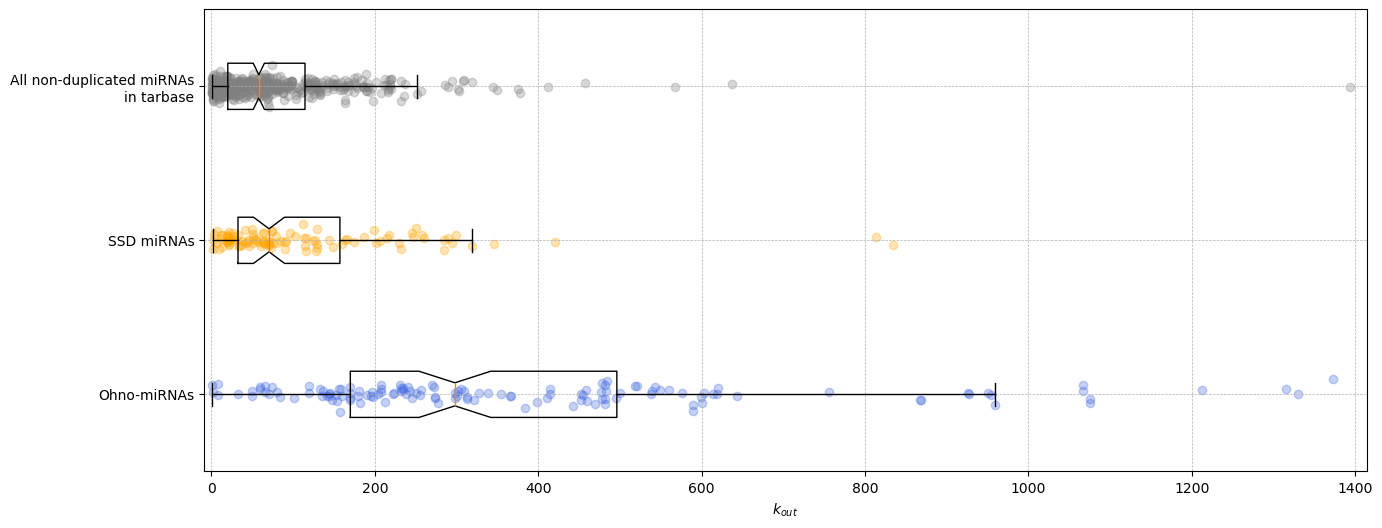

In [9]:
plt.figure(figsize=(15, 6))
alpha_boxplot = 0.3
plt.boxplot([degrees_om, degrees_pm_ensembl, degrees_nodup], vert=False, patch_artist=False,
			labels=['Ohno-miRNAs', 'SSD miRNAs', f'All non-duplicated miRNAs\nin {network}'], showfliers=False, notch=True)
plt.scatter(degrees_om, np.random.normal(1, 0.04, size=len(degrees_om)), alpha=alpha_boxplot, color='royalblue', label='OhnomiRNAs')
plt.scatter(degrees_pm_ensembl, np.random.normal(2, 0.04, size=len(degrees_pm_ensembl)), alpha=alpha_boxplot, color='orange', label='SSD-derived miRNAs')
plt.scatter(degrees_nodup, np.random.normal(3, 0.04, size=len(degrees_nodup)), alpha=alpha_boxplot, color='grey', label='Non-duplicated miRNAs')
plt.xlabel('$k_{out}$')
plt.xlim(bin_edges[0]-10, bin_edges[-1]+20)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

In [10]:
from scipy.stats import ks_2samp

ks_om_pm_ensembl = ks_2samp(degrees_om, degrees_pm_ensembl)
ks_om_all = ks_2samp(degrees_om, degrees_nodup)
ks_pm_ensembl_all = ks_2samp(degrees_pm_ensembl, degrees_nodup)

print(f'KS test between OhnomiRNAs and ParalogmiRNAs Ensembl: statistic={ks_om_pm_ensembl.statistic}, p-value={ks_om_pm_ensembl.pvalue}')
print(f'KS test between OhnomiRNAs and All miRNAs: statistic={ks_om_all.statistic}, p-value={ks_om_all.pvalue}')
print(f'KS test between ParalogmiRNAs Ensembl and All miRNAs: statistic={ks_pm_ensembl_all.statistic}, p-value={ks_pm_ensembl_all.pvalue}')

KS test between OhnomiRNAs and ParalogmiRNAs Ensembl: statistic=0.594062153163152, p-value=3.963304100585587e-20
KS test between OhnomiRNAs and All miRNAs: statistic=0.6777038841014112, p-value=3.21028254419541e-47
KS test between ParalogmiRNAs Ensembl and All miRNAs: statistic=0.13920602491687697, p-value=0.06265004207076999


/tmp/ipykernel_3011/779063160.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(


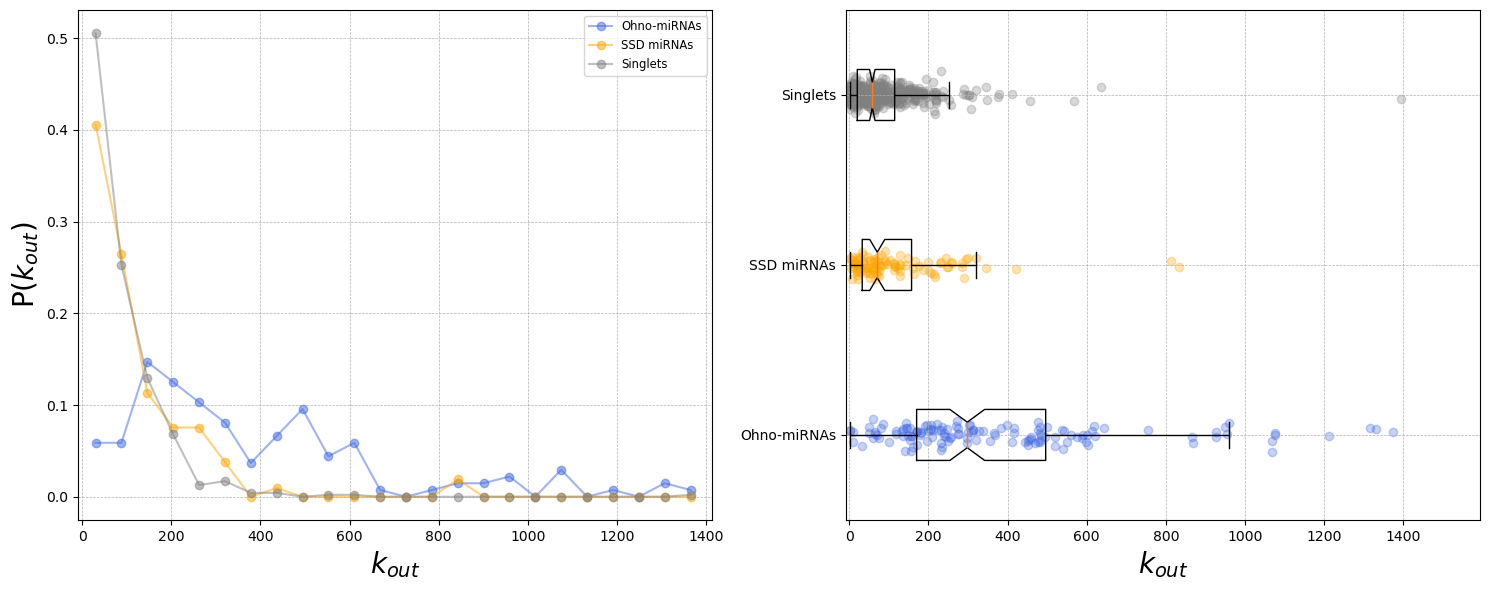

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharex=False)

# ─────────────────────────────────────────────────────────────────────────────
# Panel 1: Outdegree Distribution (line plots)
# ─────────────────────────────────────────────────────────────────────────────
ax0 = axes[0]

ax0.plot(
    bin_centers,
    rel_freq_om,
    marker='o',
    linestyle='-',
    alpha=distr_alpha,
    label=f'Ohno-miRNAs',
    color='royalblue'
)
ax0.plot(
    bin_centers,
    rel_freq_pm_ensembl,
    marker='o',
    linestyle='-',
    alpha=distr_alpha,
    label=f'SSD miRNAs',
    color='orange'
)
ax0.plot(
    bin_centers,
    rel_freq_all,
    marker='o',
    linestyle='-',
    alpha=distr_alpha,
    label=f'Singlets',
    color='grey'
)

# Set x‐limits so that both panels use the same x‐range if desired,
# or you can leave them separate. Here we match what you had:
ax0.set_xlim(bin_edges[0] - 10, bin_edges[-1] + 20)
ax0.set_xlabel('$k_{out}$', fontsize=20)
ax0.set_ylabel('P($k_{out}$)', fontsize=20)
#ax0.set_title('miRNAs Outdegree Distribution')
ax0.grid(True, which="both", ls="--", linewidth=0.5)
ax0.legend(fontsize='small')
# ─────────────────────────────────────────────────────────────────────────────

# ─────────────────────────────────────────────────────────────────────────────
# Panel 2: Horizontal Boxplot + Jittered Scatter
# ─────────────────────────────────────────────────────────────────────────────
ax1 = axes[1]

alpha_boxplot = 0.3

# Create the horizontal boxplot
bp = ax1.boxplot(
    [degrees_om, degrees_pm_ensembl, degrees_nodup],
    vert=False,
    patch_artist=False,
    labels=[
        'Ohno-miRNAs',
        'SSD miRNAs',
        'Singlets'
    ],
    showfliers=False,
    notch=True
)

# Overlay the jittered scatter on top of each boxplot row.
# We choose a small normal jitter around y = 1, 2, and 3 respectively.
y_jitter_om = np.random.normal(1, 0.04, size=len(degrees_om))
y_jitter_pm = np.random.normal(2, 0.04, size=len(degrees_pm_ensembl))
y_jitter_nd = np.random.normal(3, 0.04, size=len(degrees_nodup))

ax1.scatter(degrees_nodup, y_jitter_nd, alpha=alpha_boxplot, color='grey')
ax1.scatter(degrees_pm_ensembl, y_jitter_pm, alpha=alpha_boxplot, color='orange')
ax1.scatter(degrees_om, y_jitter_om, alpha=alpha_boxplot, color='royalblue')

ax1.set_xlabel('$k_{out}$', fontsize=20)
ax1.set_xlim(bin_edges[0] - 10, bin_edges[-1] + 200)
ax1.grid(True, which="both", ls="--", linewidth=0.5)

# (Optional) If you want a single legend for the scatter points, you can place it here:
#ax1.legend(loc='upper right', fontsize='small')

# ─────────────────────────────────────────────────────────────────────────────

plt.tight_layout()
plt.show()